In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import glob
import xarray as xr
%matplotlib inline
# %matplotlib widget

In [10]:
# loop = False
loop = True

In [2]:
# participant = 'GHIVA02_2'
# participant = 'MONLI03_3'
participant = 'PERSA01_1'

In [8]:
participants = ['GHIVA02_2','MONLI03_3','PERSA01_1']

In [13]:
def raw_to_da(participant, save = False):
    input_file = glob.glob(f"../data/{participant}/*.TXT")[0]
    with open(input_file, "r") as file:
        for i in range(2):
            line = file.readline()
    header = json.loads(line[1:])
    meta = header[next(iter(header))]
    srate = meta['sampling rate']
    data = np.loadtxt(input_file).T
    eegL = data[5] # A1
    eegR = data[6] # A2
    ecg  = data[7] # A3
    eda  = data[8] # A4
    ppg  = data[9] # A5
    
    data_to_array = [eegL , eegR, ecg , eda , ppg]
    time = np.arange(0 , eegL.size / srate,  1 / srate)
    dtypes = ['EEGL','EEGR','ECG','EDA','PPG']
    da = xr.DataArray(data=data_to_array, dims = ['dtype','time'], coords = {'dtype':dtypes, 'time':time})
    if save:
        da.to_netcdf(f'../data_in_da/da_{participant}.nc')
    return da

In [14]:
da = raw_to_da(participant)

In [15]:
if loop:
    for participant in participants:
        da = raw_to_da(participant, save=True)

In [5]:
da

<xarray.DataArray (dtype: 5, time: 661000)>
array([[575., 577., 579., ..., 395., 398., 399.],
       [615., 622., 625., ..., 568., 563., 560.],
       [593., 585., 579., ..., 500., 499., 497.],
       [679., 679., 679., ..., 573., 573., 572.],
       [ 28.,  28.,  28., ...,  27.,  27.,  27.]])
Coordinates:
  * dtype    (dtype) <U4 'EEGL' 'EEGR' 'ECG' 'EDA' 'PPG'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 661.0 661.0 661.0 661.0

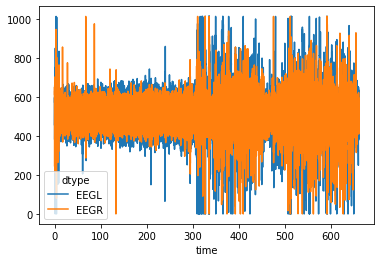

In [6]:
da.loc[['EEGL','EEGR'],:].plot.line(x='time')